In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sachinpatel21/az-handwritten-alphabets-in-csv-format")

print("Path to dataset files:", path)

100%|██████████| 185M/185M [00:00<00:00, 243MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format/versions/5


In [3]:
!pip install numpy pandas matplotlib scikit-learn tensorflow seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 592.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.1 MB/s eta 0:00:00


In [2]:
import shutil
try:
  shutil.move("/root/.cache/kagglehub/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format/versions/5","/content/data")
except Exception as e:
  print(e)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [6]:
data=pd.read_csv('/content/data/A_Z Handwritten Data.csv').astype('float32')
X=data.drop('0',axis=1).values
y=data['0'].values




In [7]:
X=X/255.0
X=X.reshape(-1,28,28,1)
y=to_categorical(y,num_classes=26)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
model=Sequential(
    [
        Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(256,activation='relu'),
        Dropout(0.5),
        Dense(26,activation='softmax')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))
model.save('alphabet_classifier.h5')

Epoch 1/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 216s 92ms/step - accuracy: 0.8694 - loss: 0.4592 - val_accuracy: 0.9824 - val_loss: 0.0659
Epoch 2/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 212s 91ms/step - accuracy: 0.9731 - loss: 0.0959 - val_accuracy: 0.9870 - val_loss: 0.0486
Epoch 3/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 212s 91ms/step - accuracy: 0.9795 - loss: 0.0713 - val_accuracy: 0.9887 - val_loss: 0.0411
Epoch 4/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 211s 91ms/step - accuracy: 0.9837 - loss: 0.0560 - val_accuracy: 0.9892 - val_loss: 0.0385
Epoch 5/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 211s 91ms/step - accuracy: 0.9858 - loss: 0.0474 - val_accuracy: 0.9905 - val_loss: 0.0354
Epoch 6/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 211s 91ms/step - accuracy: 0.9879 - loss: 0.0405 - val_accuracy: 0.9922 - val_loss: 0.0314
Epoch 7/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 211s 90ms/step - accuracy: 0.9894 - loss: 0.0347 - val_accuracy: 0.9931 - val_loss: 0.0280
Epoch 8/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 211s 91ms/step - accuracy: 

In [13]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy : {test_acc}")


2328/2328 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9940 - loss: 0.0258
Test accuracy : 0.9939589500427246


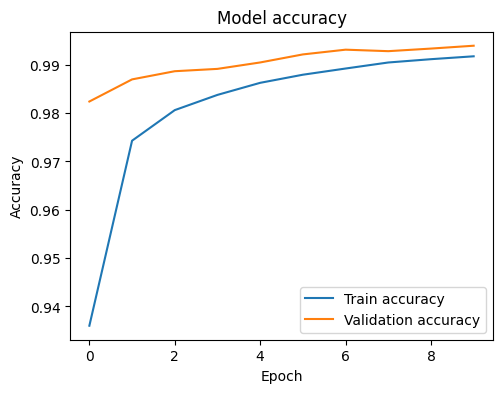

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

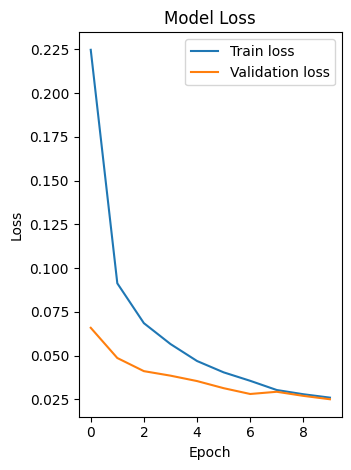

In [15]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.8 MB/s eta 0:00:00


In [19]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [20]:
alph_map={i:chr(65+i) for i in range(26)}

In [21]:
def preprocess(img_path):
  img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
  if img is None:
    raise ValueError("Could not load image")
  img=cv2.resize(img,(28,28))
  img=255-img
  img=img.astype('float32')/255.0
  img=img.reshape(1,28,28,1)
  return img


In [22]:
def predict(img_path):
  img=preprocess(img_path)
  pred=model.predict(img)
  predicted_cls=np.argmax(pred,axis=1)[0]
  conf=np.max(pred)
  return alph_map[predicted_cls],conf

In [42]:
def main():
  img_path="/content/data/m3.png"
  try:
    pred_alph,conf=predict(img_path)
    print(f"Predicted :{pred_alph} , Confidence :{conf}")
    img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    plt.imshow(img,cmap='gray')
    plt.title(f"Predicted  : {pred_alph} : {conf}")
    plt.axis('off')
    plt.show()
  except Exception as e:
    print(f"Error {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted :M , Confidence :0.8597503304481506


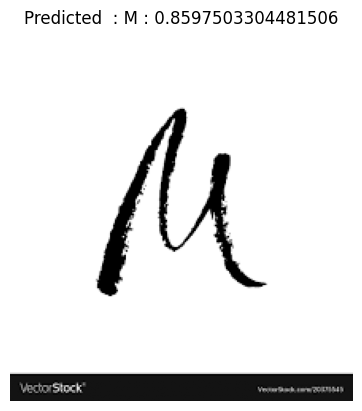

In [43]:
main()